In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
import pandas as pd

# path to the training data set (raw data without column names)
file_path = '/content/drive/My Drive/Tesi/adult/adult.data'

# column names extracted from adult.names file
columns = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race",
    "sex", "capital_gain", "capital_loss", "hours_per_week",
    "native_country", "income"
]

# Function for checking the leading spaces in categorical columns! (it verifies the presence of leading spaces)
"""
def check_leading_spaces(df):
    for col in df.select_dtypes(include=["object"]):
        has_spaces = df[col].astype(str).str.startswith(" ")
        if has_spaces.any():
            print(f" Column '{col}' has values with leading spaces!")
        else:
            print(f" Column '{col}' has NO leading spaces.")

check_leading_spaces(df)
"""


#another function for checking the trailing space! (it verifies that there is no sign of presence of trailing space! in each categorical columns!)
"""
def check_trailing_spaces(df):
    for col in df.select_dtypes(include=["object"]):
        has_spaces = df[col].astype(str).str.endswith(" ")
        if has_spaces.any():
            print(f" Column '{col}' has values with trailing spaces!")
        else:
            print(f" Column '{col}' has NO trailing spaces.")

check_trailing_spaces(df)
"""
#we take care of leading spaces here when we read the file
#also we want to conver the missing values from "?" to NaN
df = pd.read_csv(file_path, header=None, names=columns, na_values="?", skipinitialspace=True)

df.head(25)




,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


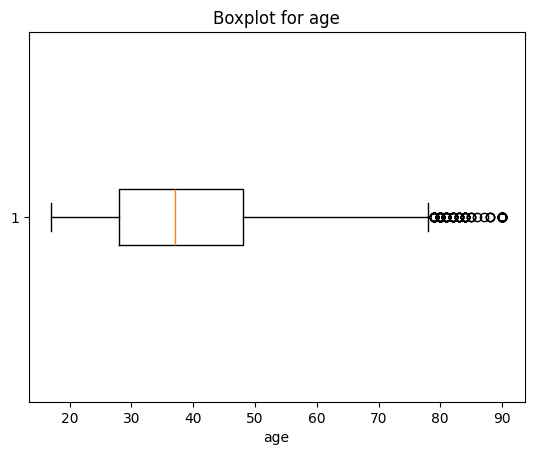

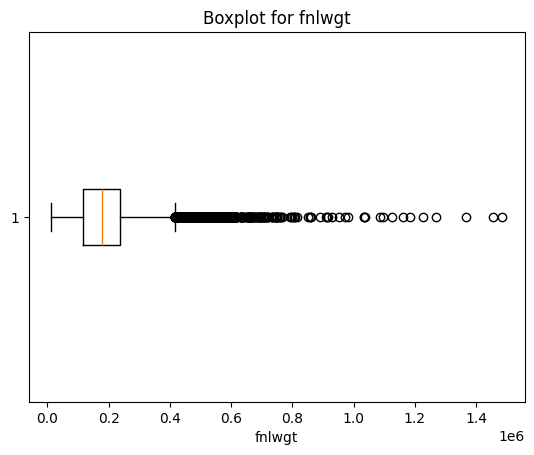

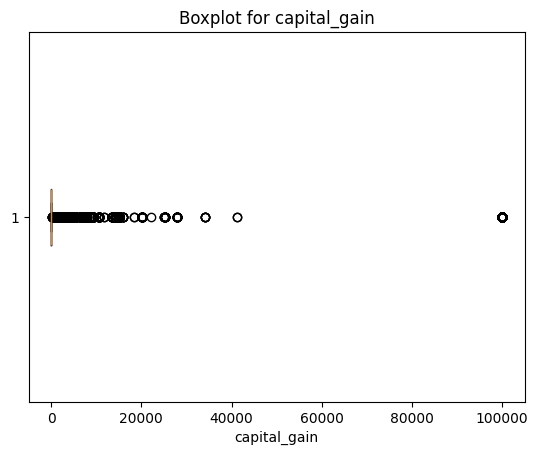

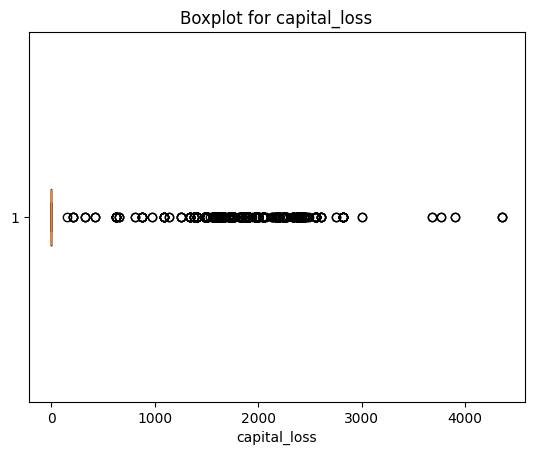

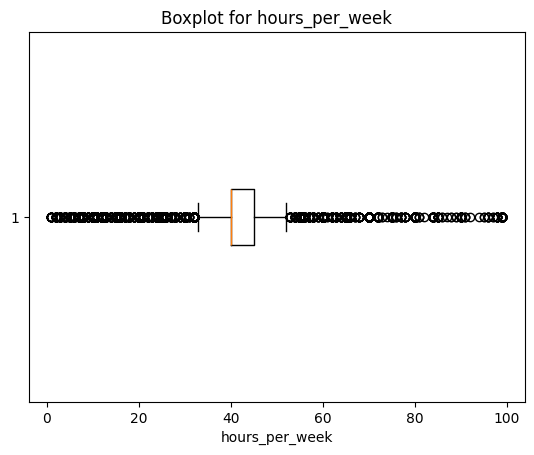

In [136]:
#Optional
import matplotlib.pyplot as plt

# List of numeric columns to check for the existance of outliers
numeric_columns = ["age", "fnlwgt", "capital_gain", "capital_loss", "hours_per_week"]

# Plotting boxplots for each numeric column! (also could use violinplot!)
for col in numeric_columns:
    plt.figure()
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()
#but for the purpose of this preprocessing, we will keep them! (we don't touch the outliers! for example age over 80 is quite natural and not due to error!)

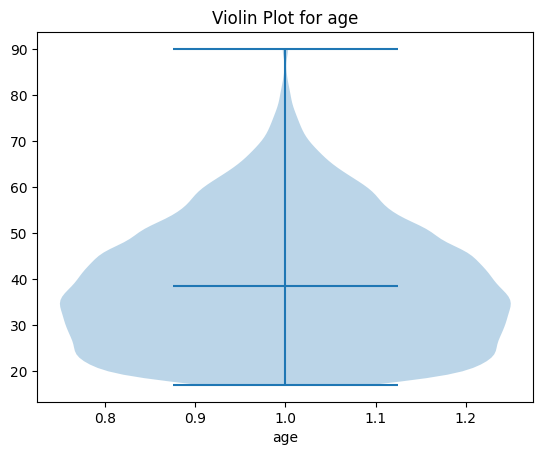

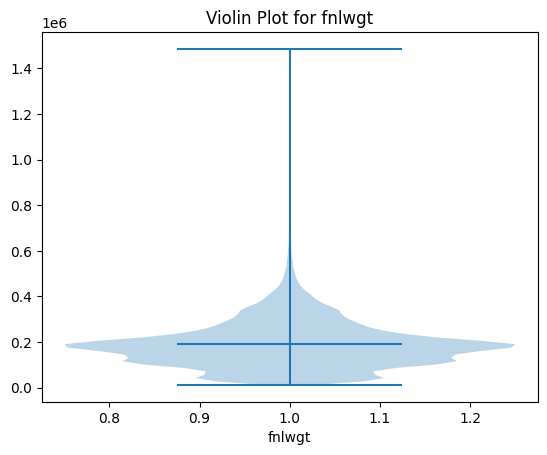

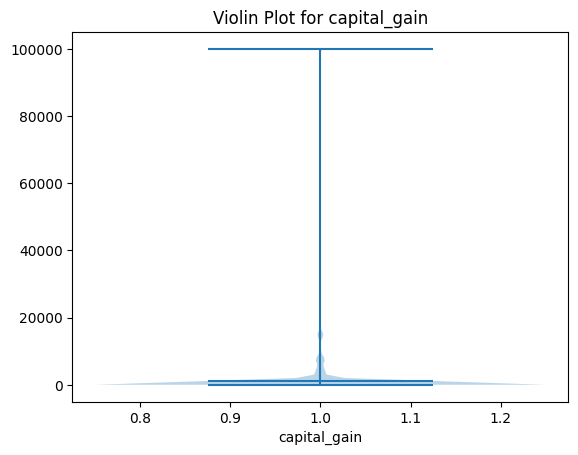

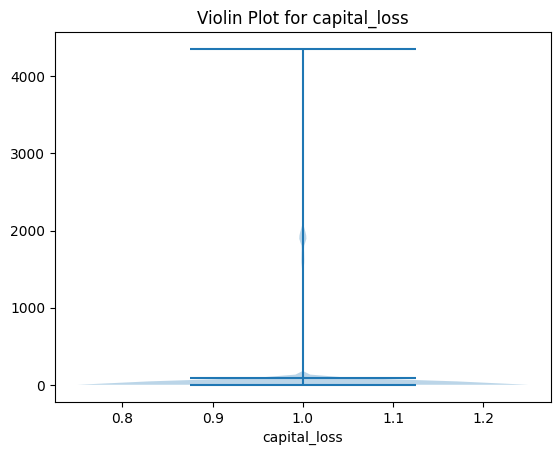

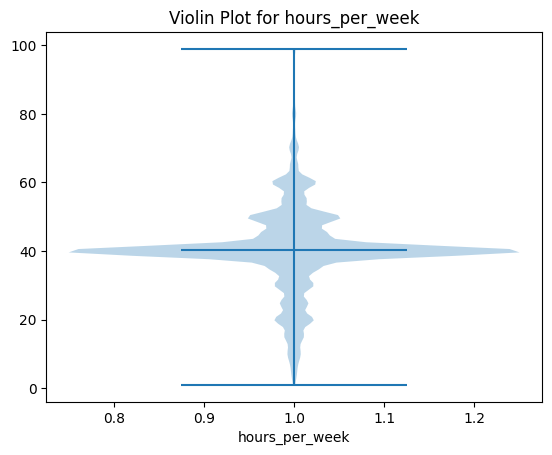

In [145]:
#Optional
#also violinplot could be useful
for col in numeric_columns:
    plt.figure()
    plt.violinplot(df[col].dropna(), showmeans=True)
    plt.title(f'Violin Plot for {col}')
    plt.xlabel(col)
    plt.show()


In [114]:
#A quick check to see if any numeric attribute has a type of object, so we can fix it!
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


In [115]:
df.shape


(32561, 15)

In [116]:
#check to see if there are some duplicated rows and then remove them!
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df.drop_duplicates(inplace=True)
df.shape

Number of duplicate rows: 24


(32537, 15)

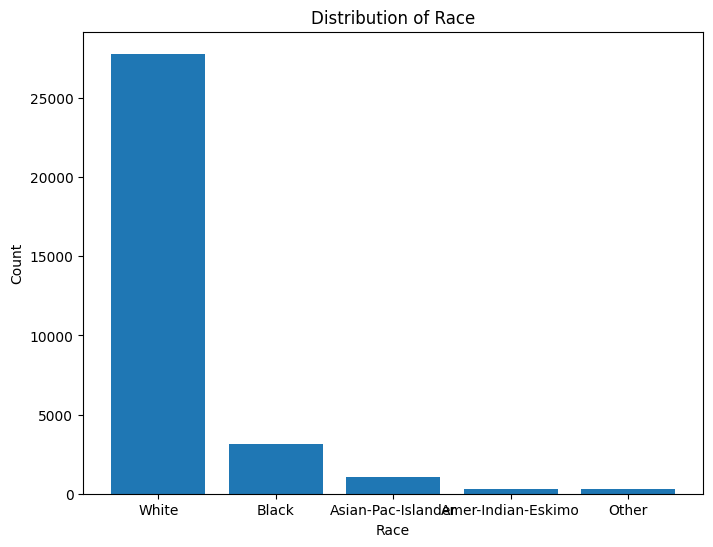

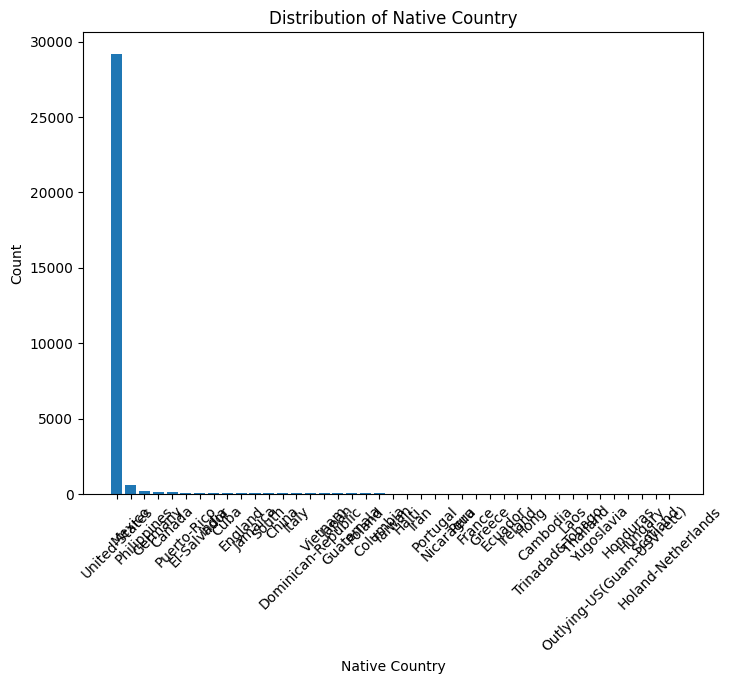

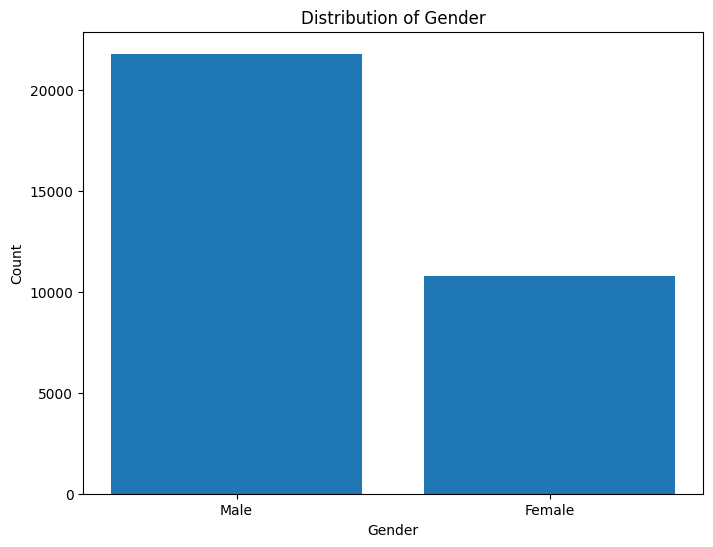

In [117]:
#Summary Statistic analysis (to better understand the dataset, and to start identifying possible errors and issues present in the dataset.)
#for numerical attributes
df.describe()
#for categorical attributes
df.describe(include=[object])


#let's plot them for better visualization!
import matplotlib.pyplot as plt
# Distribution for Race
race_counts = df['race'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(race_counts.index, race_counts.values)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Race')
plt.show()

# Distribution for Native Country
native_counts = df['native_country'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(native_counts.index, native_counts.values)
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.title('Distribution of Native Country')
plt.xticks(rotation=45)  # Rotate labels because there are many countries and there are long names
plt.show()

# Distribution for Gender
gender_counts = df['sex'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()


In [118]:
#missing ration
missing_ratio_percentage = (df.isnull().sum() / len(df)) * 100
print("Missing Ratio Percentage:\n", missing_ratio_percentage)

Missing Ratio Percentage:
 age               0.000000
workclass         5.642807
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        5.664321
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    1.788733
income            0.000000
dtype: float64


In [119]:
#the attribute occupation is not necessary for our purpose so we drop it!
df.drop('occupation', axis=1, inplace=True)

In [120]:
# Check how many rows contain missing values
missing_rows_count = df.isnull().any(axis=1).sum()
print("Rows that contain missing values:", missing_rows_count)
#we have about 7% rows with missing values and we decide to remove them.
df_cleaned= df.dropna() #the best practice could be to avoid using inplace=True here, but personally I would prefer to do it!
print("End of cleaning phase")
df_cleaned.shape

Rows that contain missing values: 2391
End of cleaning phase


(30146, 14)

In [121]:
#feature selection
df_cleaned.drop(columns=['marital_status', 'relationship', 'capital_gain', 'capital_loss', 'education','fnlwgt'], inplace=True)
df_cleaned.shape

<ipython-input-121-e0245ed08fc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['marital_status', 'relationship', 'capital_gain', 'capital_loss', 'education','fnlwgt'], inplace=True)


(30146, 8)

In [122]:
df_cleaned.head()

,age,workclass,education_num,race,sex,hours_per_week,native_country,income
0,39,State-gov,13,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,13,White,Male,13,United-States,<=50K
2,38,Private,9,White,Male,40,United-States,<=50K
3,53,Private,7,Black,Male,40,United-States,<=50K
4,28,Private,13,Black,Female,40,Cuba,<=50K


<ipython-input-123-88c8e4dc525c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


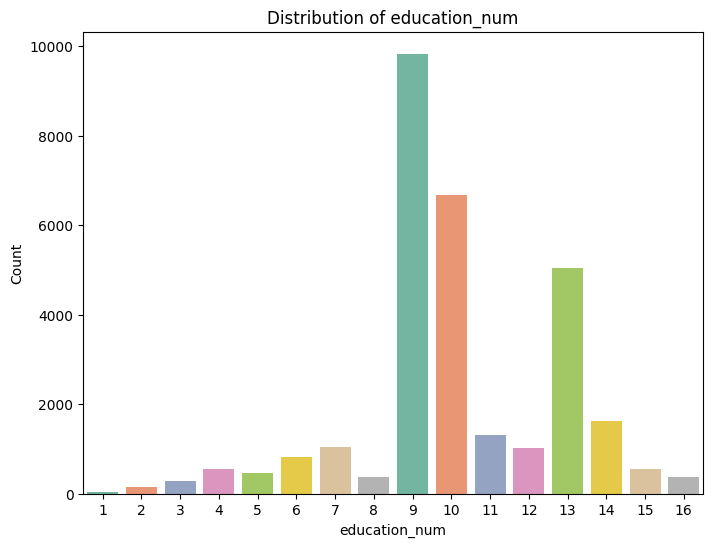

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(
    x='education_num',  # or y='education_num' for a horizontal bar chart as in the Thesis of signora Rebessi
    data=df_cleaned,
    palette='Set2',
   # hue='education_num'
)
plt.title("Distribution of education_num")
plt.xlabel("education_num")
plt.ylabel("Count")
plt.show()


<ipython-input-124-f54680e1f5ec>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['education_degree'] = pd.cut(
<ipython-input-124-f54680e1f5ec>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


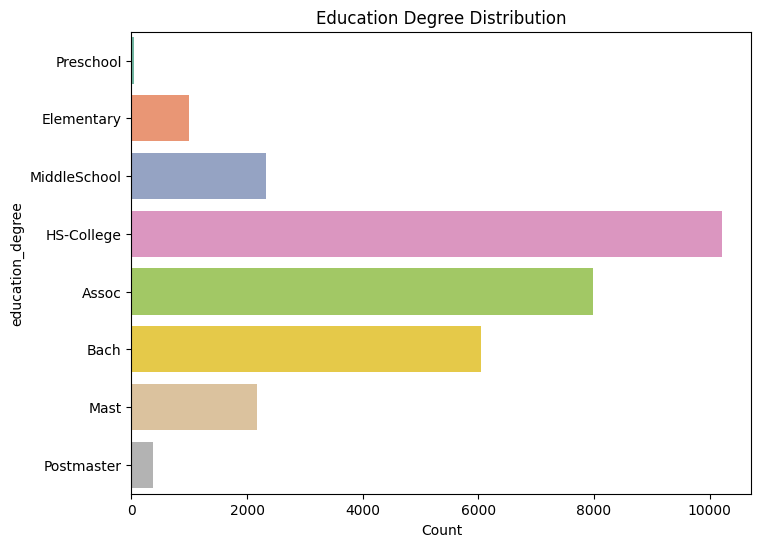

In [124]:
import numpy as np
import pandas as pd

# Define the bins and corresponding labels
bins = [1, 2, 5, 8, 10, 12, 14, 16, np.inf]
labels = [
    'Preschool',      # covers education_num = 1
    'Elementary',     # covers education_num in [2..4]
    'MiddleSchool',   # covers education_num in [5..7]
    'HS-College',     # covers education_num in [8..9]
    'Assoc',          # covers education_num in [10..11]
    'Bach',           # covers education_num in [12..13]
    'Mast',           # covers education_num in [14..15]
    'Postmaster'      # covers education_num >= 16
]

# Create a new categorical column 'education_degree'
df_cleaned['education_degree'] = pd.cut(
    df_cleaned['education_num'],
    bins=bins,
    labels=labels,
    right=False  # left-closed, right-open intervals
)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Ensure the order matches the labels list so the bars appear in the correct sequence
sns.countplot(
    y='education_degree',
    data=df_cleaned,
    order=labels,       # Use the same order as your label list
    palette='Set2',     # optional color palette
    # If you get a deprecation warning about palette with no hue, you can remove `palette`
    # or set hue='education_degree' (and legend=False).
)

plt.title("Education Degree Distribution")
plt.xlabel("Count")
plt.ylabel("education_degree")
plt.show()


In [134]:
#Discretization
import pandas as pd

#bins and labels for hours_per_week
hours_bins = [0, 20, 40, 60, 80, 100]
hours_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# here we create a new column 'hours_range' using pd.cut()
df_cleaned['hours_range'] = pd.cut(
    df_cleaned['hours_per_week'],
    bins=hours_bins,
    labels=hours_labels,
    include_lowest=True,  # include the leftmost edge
    right=True            # intervals will be left-inclusive, right-exclusive
)

# Droping the original 'hours_per_week' column
df_cleaned.drop('hours_per_week', axis=1, inplace=True)



#bins and labels for age
age_bins = [15, 30, 45, 60, 75, 90]
age_labels = ['15-30', '30-45', '45-60', '60-75', '75-90']

df_cleaned['age_range'] = pd.cut(
    df_cleaned['age'],
    bins=age_bins,
    labels=age_labels,
    include_lowest=True,
    right=True
)

# Dropping the original 'age' column
df_cleaned.drop('age', axis=1, inplace=True)


df_cleaned[['hours_range', 'age_range']].head()

print("Hours Range Distribution:")
df_cleaned['hours_range'].value_counts()

print("\nAge Range Distribution:")
df_cleaned['age_range'].value_counts()

df_cleaned.head(10)
df_cleaned.drop('education_num', axis=1, inplace=True)
print("now the dataset is cleaned and we are left with the 8 selected features")
df_cleaned.shape

,workclass,race,sex,native_country,income,education_degree,hours_range,age_range
0,State-gov,White,Male,United-States,<=50K,Bach,21-40,30-45
1,Self-emp-not-inc,White,Male,United-States,<=50K,Bach,0-20,45-60
2,Private,White,Male,United-States,<=50K,HS-College,21-40,30-45
3,Private,Black,Male,United-States,<=50K,MiddleSchool,21-40,45-60
4,Private,Black,Female,Cuba,<=50K,Bach,21-40,15-30
5,Private,White,Female,United-States,<=50K,Mast,21-40,30-45
6,Private,Black,Female,Jamaica,<=50K,MiddleSchool,0-20,45-60
7,Self-emp-not-inc,White,Male,United-States,>50K,HS-College,41-60,45-60
8,Private,White,Female,United-States,>50K,Mast,41-60,30-45
9,Private,White,Male,United-States,>50K,Bach,21-40,30-45
